<a href="https://colab.research.google.com/github/Hion-cy/ClassFiles/blob/main/Practica_21_AL263158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica #21: Regresión Lineal Simple

##Objetivo

Aplicar regresión lineal simple para modelar la relación entre la población de una ciudad (poblation) y las ganancias (profit) de un restaurante. Analizar los supuestos del modelo y evaluar su rendimiento.

##Datos

Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

* **poblation:** población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

* **profit:** ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de 10,000.  Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.

##Descripción del problema

Supongamos que usted es el director ejecutivo de una franquicia de restaurantes y está considerando diferentes ciudades para abrir un nuevo local. Le gustaría expandir su negocio a ciudades que podrían generar mayores ganancias para su restaurante. La cadena ya tiene restaurantes en varias ciudades y usted cuenta con datos sobre ganancias y población de dichas ciudades. Deberá construir un modelo de regresión para explicar y predecir las ganancias a partir de la población.

##Parte 1: Carga de datos y bibliotecas

1. Importa las bibliotecas necesarias para realizar esta práctica

2. Carga el archivo restaurantes.csv

3. Muestra las primeras filas del dataframe.

4. Describe estadísticamente el conjunto de datos.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import probplot

df=pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')
print(df.head())
print(df.describe())
print(df.info())

   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233
       poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   poblation  97 non-null     float64
 1   profit     97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None


##Parte 2: Análisis exploratorio y relación entre variables

###2.1 Análisis de la Relación Lineal Entre Variable Dependiente y la Independiente



1. Grafica un diagrama de dispersión entre Poblation y Profit usando seaborn.scatterplot().

2. Responde: **¿La relación entre las variables parece lineal? ¿Por qué?**

*Tiene una tendencia lineal por que graficamente podemos observar que la linea se desplaza en lo que parece ser en una diagonal. Sin embargo la parte inicial de la grafica es dipersa hacia arriba y abajo lo que desmentiria  el que sea linea*

<Axes: xlabel='poblation', ylabel='profit'>

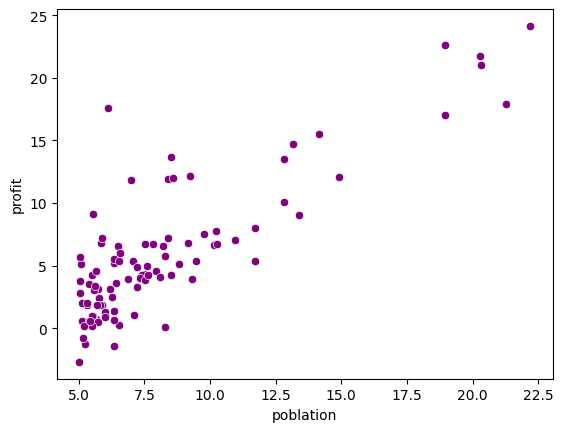

In [4]:
sns.scatterplot(x='poblation', y='profit', data=df, color='purple')
#

###2.2 Cálculo e Interpretación de la Correlación

1. Calcula el coeficiente de correlación de Pearson

2. Imprime el valor y responde lo siguiente:

3. ¿Qué tan fuerte es la relación entre las variables?
*0.84 indica que la correlacion de ambas columnas es muy fuerte*

4. ¿La dirección es positiva o negativa?
*Positiva*

5. ¿Este valor es coherente con lo que observaste en el gráfico de dispersión?
*Si, la tendencia en diagonal afirma la correlacion de los datos*

In [5]:
#plt.figure(figsize=(12, 8))
#correlation_matrix = df.corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
#plt.title("Heatmap de Correlación entre Variables")
#plt.show()

correlacion=np.corrcoef(df['poblation'], df['profit']).round(2)
coeficiente_r = correlacion[0, 1]

print(f"Matriz de Correlación de Pearson:\n{correlacion}")
print(f"\nCoeficiente de Correlación (r): {coeficiente_r:.4f}")

Matriz de Correlación de Pearson:
[[1.   0.84]
 [0.84 1.  ]]

Coeficiente de Correlación (r): 0.8400


##Parte 3. Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes

1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
*Que aun cuando la poblacion del restaurante se ade 0 clientes debe existir una ganancia de al menos 5.839.*
4. Interpreta el coeficiente de la regresión ¿Qué significa en términos del contexto del problema?
*Cada incremento de unidad poblacional debe hacer que la ganania inclemente 4.493 unidades.*

In [14]:
features = ['poblation']
target = 'profit'
df2 = df[features + [target]].copy()
num_features = ['poblation']

preprocessor=ColumnTransformer([
    ('num', StandardScaler(), num_features)
])

alpha=0.1
lasso=Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=alpha))
])

x=df2[features]
y=df2[target]
lasso.fit(x,y)
f_names=num_features
coef=pd.Series(lasso)
coef = pd.Series(lasso.named_steps["lasso"].coef_, index=f_names)
print(coef)
intercepto = lasso.named_steps["lasso"].intercept_
print("Intercepto:", intercepto)


poblation    4.493041
dtype: float64
Intercepto: 5.839135051546391


### 3.2 Visualización del modelo

* Grafica los puntos originales (Poblation vs Profit) y dibuja la línea de regresión ajustada.

* Asegúrate de incluir leyenda y títulos adecuados

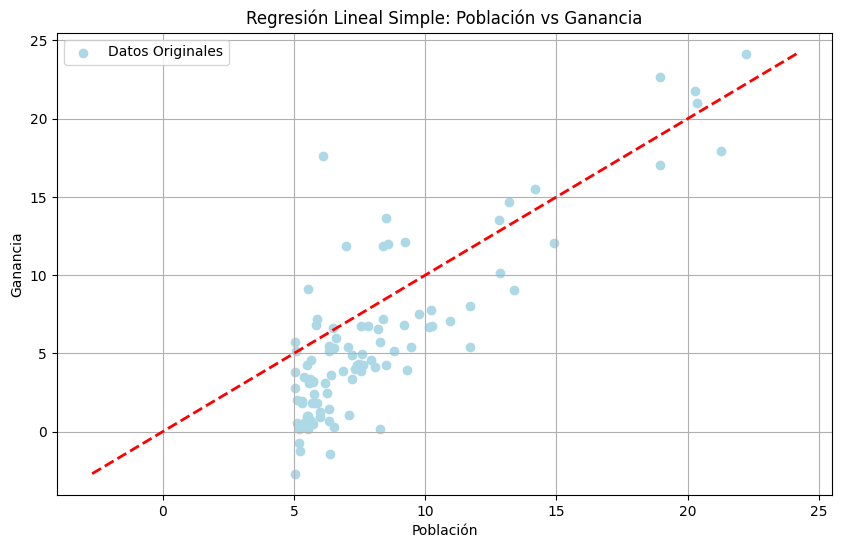

In [19]:
y_pred = lasso.predict(x)
#Grafica original
plt.figure(figsize=(10, 6))
plt.scatter(df['poblation'], df['profit'], color='lightblue', label='Datos Originales')
# Use the calculated intercepto and coef for the plot label
#plt.plot(df['poblation'],y_pred, color='red', label=f'Línea de Regresión Ajustada\n(y = {intercepto:.2f} + {coef[0]:.2f}x)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Población')
plt.ylabel('Ganancia')
plt.title('Regresión Lineal Simple: Población vs Ganancia')
plt.legend()
plt.grid(True)
plt.show()

##Parte 4. Supuestos del Modelo de Regresión

###4.1. Normalidad de los residuos

1. Calcula los residuos: diferencia entre los valores reales y los valores predichos.
2. Grafica los residuos usando histograma con KDE (Kernel Density Estimation)
3. Responde: Responde: ¿Los residuos siguen una distribución aproximadamente normal?
*Si es aproximadamente normal por que forman en su mayoria una campana simetrica, sin embargo muestran una ligera protuberancia (asimetria) que demostraria graficamente que no es perfectamente normal.*

0     14.144985
1      6.362881
2      7.404124
3      7.364685
4      3.668400
        ...    
92     4.035279
93    -0.520982
94    -5.850514
95    -2.892654
96    -2.044301
Name: profit, Length: 97, dtype: float64


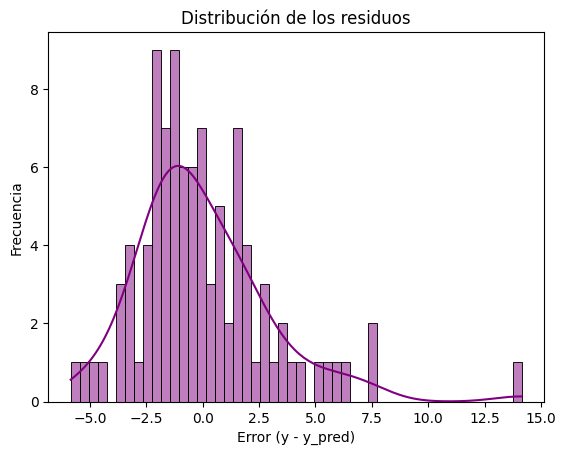

In [28]:
residuals = y - y_pred
print(residuals)
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.xlabel("Error (y - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos")
plt.show()

###4.2 Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. Responde: ¿Los residuos están distribuidos de manera aleatoria o muestran algún patrón?
*Muestran un patrón, por lo que no están distribuidos de forma completamente aleatoria.

Los puntos de error están bastante juntos al inicio de la gráfica (en el lado izquierdo, cerca del cero), pero se van separando y abriendo mucho más conforme avanzo hacia los valores más altos.*

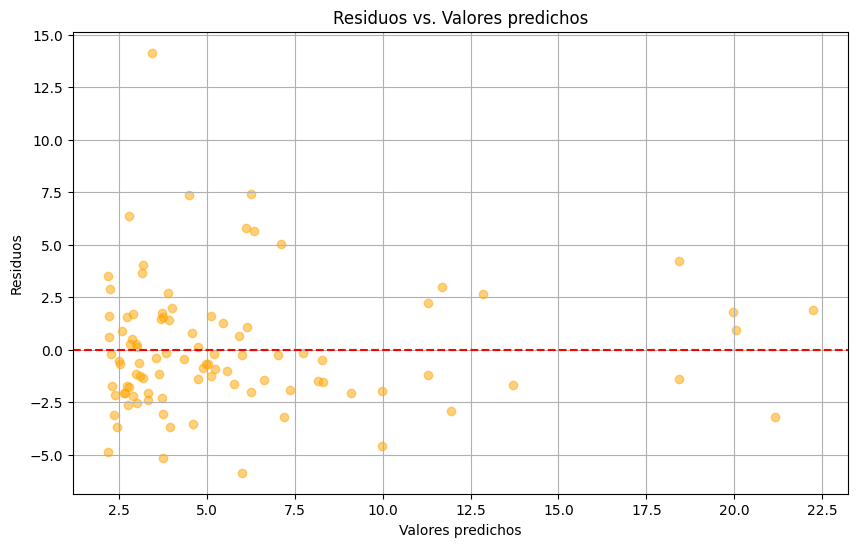

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(x=y_pred, y=residuals, alpha=0.5,color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores predichos')
plt.grid(True)
plt.show()

###4.3 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:
* Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal.
* Desviaciones sistemáticas indican asimetría o colas pesadas.

*NO es una normalidad perfecta pero si una muy cercana. El grafico muestra que la mayoria de los residuos se alinean muy cercanamente a la diagonal, es al inicio y final de la grafica donde es posible obervar que los outliers podrian ser los culpables de esta diferencia*

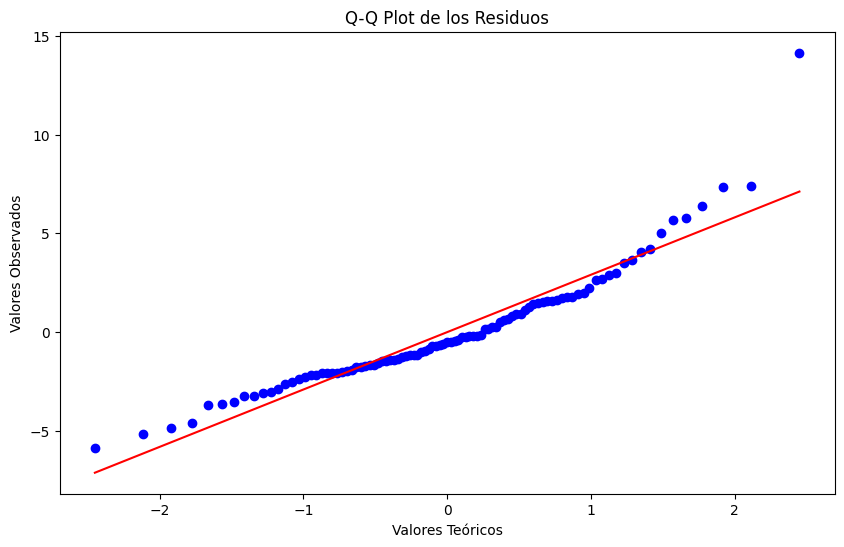

In [40]:
plt.figure(figsize=(10, 6))
probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot de los Residuos')
plt.xlabel('Valores Teóricos')
plt.ylabel('Valores Observados')*

plt.show()

##Parte 5. Evaluación del Modelo

1. Calcula las métricas de evaluación:

* MSE (Error cuadrático medio)

* RMSE (Raíz del error cuadrático medio)

* R² (Coeficiente de determinación)

Responde: ¿Qué nos dicen estas métricas sobre el ajuste del modelo?
*El modelo de Población es un predictor fuerte y útil de la Ganancia ($R^2=0.70$ y MAE=$2.20$). Se puede confiar en él, pero debe usarse con precaución, sabiendo que las predicciones de Ganancias muy grandes tienen una mayor posibilidad de error (confirmado por el RMSE más alto y el patrón de los residuos).*

In [44]:
# Evaluación del modelo con métricas de desempeño
MSE = mean_squared_error(y, y_pred)  # Error cuadrático medio
RMSE = np.sqrt(MSE)  # Raíz del error cuadrático medio
MAE = mean_absolute_error(y, y_pred)  # Error absoluto medio
R2 = r2_score(y, y_pred)  # Coeficiente de determinación
n_nonzero_coef = np.sum(coef != 0)  # Número de coeficientes distintos de cero

print(f"Error cuadrático medio (MSE): {MSE:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {RMSE:.2f}")
print(f"r2: {R2:.2f}")
print(f"Número de coeficientes distintos de cero: {n_nonzero_coef}")

Error cuadrático medio (MSE): 8.96
Raíz del error cuadrático medio (RMSE): 2.99
r2: 0.70
Número de coeficientes distintos de cero: 1


##Parte 6: Conclusiones



¿Qué tan útil consideras el modelo para hacer predicciones?

*De acuerdo con los metricos obtenidos es muy util sin embargo, no puede considerarse 100% confiable*

¿Cuáles son sus limitaciones?

*Las ganancias muy grandes tienen mayores posibilidades de error*

¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

Se aplico un ajuste utilizando box-cox ya que el patron de los datos sugeria errores en la interpretacion. En las siguientes graficas se minimiza el patron y se observa una diagonal mas clara.

Lambda óptima de Box-Cox: 0.1519


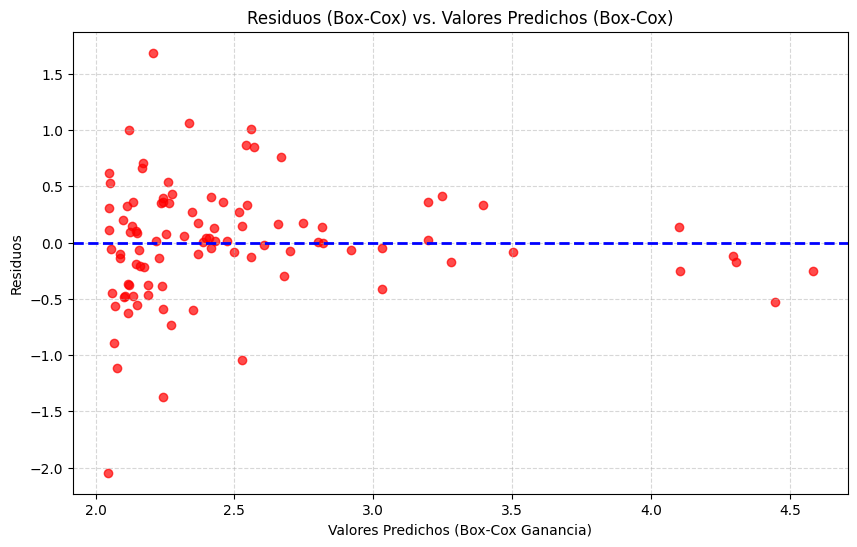

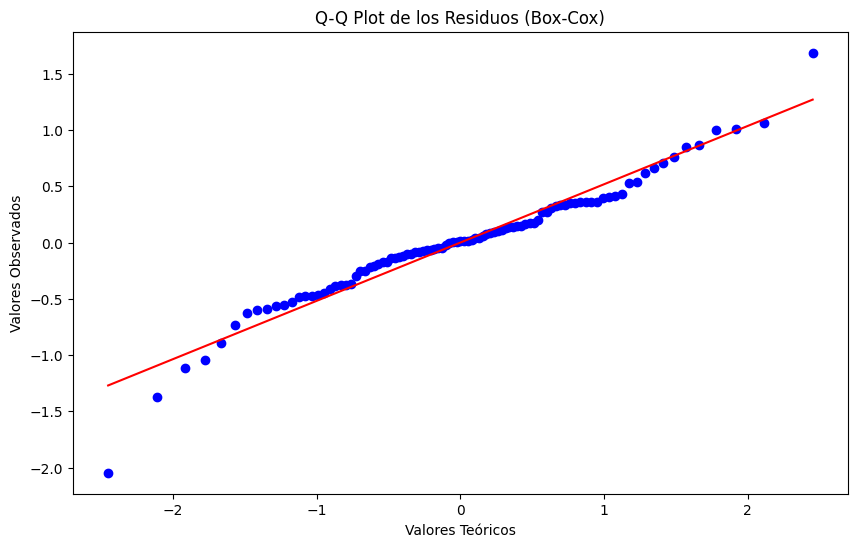

Error cuadrático medio (MSE) con Box-Cox: 0.27
Raíz del error cuadrático medio (RMSE) con Box-Cox: 0.52
r2 con Box-Cox: 0.54


In [59]:
from scipy.stats import boxcox

min_profit = df['profit'].min()
C = 1 - min_profit if min_profit <= 0 else 0
df['profit_boxcox'], lmbda = boxcox(df['profit'] + C)

print(f"Lambda óptima de Box-Cox: {lmbda:.4f}")
from sklearn.linear_model import LinearRegression
modelo_boxcox = LinearRegression()

y_boxcox = df['profit_boxcox']
modelo_boxcox.fit(x, y_boxcox)
y_boxcox_pred = modelo_boxcox.predict(x)
residuals_boxcox = y_boxcox - y_boxcox_pred

# Graficar los residuos para ver si el cono desapareció
plt.figure(figsize=(10, 6))
plt.scatter(y_boxcox_pred, residuals_boxcox, color='red', alpha=0.7)
plt.axhline(y=0, color='blue', linestyle='--', linewidth=2)
plt.title('Residuos (Box-Cox) vs. Valores Predichos (Box-Cox)')
plt.xlabel('Valores Predichos (Box-Cox Ganancia)')
plt.ylabel('Residuos')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#qqplot
plt.figure(figsize=(10, 6))
probplot(residuals_boxcox, dist='norm', plot=plt)
plt.title('Q-Q Plot de los Residuos (Box-Cox)')
plt.xlabel('Valores Teóricos')
plt.ylabel('Valores Observados')
plt.show()

MSE_boxcox = mean_squared_error(y_boxcox, y_boxcox_pred)
RMSE_boxcox = np.sqrt(MSE_boxcox)
r2_boxcox = r2_score(y_boxcox, y_boxcox_pred)
print(f"Error cuadrático medio (MSE) con Box-Cox: {MSE_boxcox:.2f}")
print(f"Raíz del error cuadrático medio (RMSE) con Box-Cox: {RMSE_boxcox:.2f}")
print(f"r2 con Box-Cox: {r2_boxcox:.2f}")

El modelo nos confirma que la Población es muy importante para predecir las Ganancias, ya que explica más de la mitad ($54\%$) de la razón por la cual las ganancias varían de una ciudad a otra. Inicialmente, el modelo tenía un fallo grave (heterocedasticidad o "cono" de error), lo que hacía que las predicciones de ganancias altas no fueran confiables. Tuvimos que hacer un ajuste matemático (Box-Cox) para corregir ese fallo y hacer que el modelo sea válido. Por lo tanto, el modelo final es robusto y confiable para usar la Población como base para la toma de decisiones, aunque siempre debemos recordar que casi la mitad de la ganancia restante ($46\%$) depende de otros factores (como la competencia o los costos).